# Clan and coda type detection with RNN

In [1]:
from sperm_whale_bioacoustics.data import *
from sperm_whale_bioacoustics import model_pretrain

from fastai2.basics import *
from fastai2.learner import *
from fastai2.callback.all import *

Let's load the pretrained model

In [2]:
dls = datasets_clan.dataloaders(bs = 128)
learn = Learner(dls, model_pretrain.Model(), loss_func=MSELossFlat())
if Path('models').exists(): learn.load('pretrained'); # to accomodate the CI pipeline on github

Let's freeze the first layer.

In [3]:
learn.model.lstm1.requires_grad_(False)

LSTM(1, 256, batch_first=True)

We can manipulate the model in place.

In [5]:
learn.model.lstm2.reset_parameters()
learn.model.lin.reset_parameters()

In [6]:
learn.loss_func = BCEWithLogitsLossFlat()

And we should be all set to train!

In [7]:
learn.model.cuda()

Model(
  (lstm1): LSTM(1, 256, batch_first=True)
  (lstm2): LSTM(256, 256, batch_first=True)
  (lin): Linear(in_features=256, out_features=1, bias=True)
)

In [8]:
learn.summary()

Model (Input shape: ['128 x 9'])
Layer (type)         Output Shape         Param #    Trainable 
LSTM                 ['128 x 9 x 256', "  265,216    False     
________________________________________________________________
LSTM                 ['128 x 9 x 256', "  526,336    True      
________________________________________________________________
Linear               128 x 1              257        True      
________________________________________________________________

Total params: 791,809
Total trainable params: 526,593
Total non-trainable params: 265,216

Optimizer used: <function Adam at 0x7f157c6ac4d0>
Loss function: FlattenedLoss of BCEWithLogitsLoss()

Model unfrozen

Callbacks:
  - TrainEvalCallback
  - Recorder
  - ProgressCallback

(0.33113112449646, 0.43651583790779114)

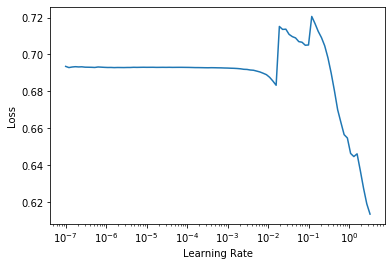

In [9]:
learn.lr_find()

In [19]:
learn.metrics = [accuracy_multi]

In [18]:
learn.fit(3, 1e-3)

epoch,train_loss,valid_loss,,time
0,0.141267,0.185455,0.931579,00:00
1,0.139791,0.183104,0.936842,00:00
2,0.141007,0.186374,0.931579,00:00


In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.142108,0.219167,0.915789,00:01
1,0.166871,0.507633,0.742105,00:01
2,0.187387,0.254010,0.900000,00:00
3,0.180389,0.186427,0.931579,00:01
4,0.166520,0.236148,0.900000,00:01
5,0.155429,0.198630,0.936842,00:00
6,0.147592,0.196275,0.931579,00:01
7,0.141676,0.178532,0.936842,00:00
8,0.135590,0.179164,0.931579,00:01
9,0.130743,0.179600,0.931579,00:00


In [71]:
learn.get_preds()

(tensor([[0.9823],
         [0.0835],
         [0.9993],
         [0.9933],
         [0.0438],
         [0.9928],
         [0.9978],
         [0.1162],
         [0.0388],
         [0.0351],
         [0.9942],
         [0.9941],
         [0.9952],
         [0.9888],
         [0.9962],
         [0.0944],
         [0.9506],
         [0.1814],
         [0.0295],
         [0.9880],
         [0.0364],
         [0.0345],
         [0.9873],
         [0.9859],
         [0.9932],
         [0.0776],
         [0.0343],
         [0.9955],
         [0.0387],
         [0.0466],
         [0.0355],
         [0.9956],
         [0.0178],
         [0.0507],
         [0.6275],
         [0.0592],
         [0.9953],
         [0.0346],
         [0.9848],
         [0.9931],
         [0.0225],
         [0.0815],
         [0.0603],
         [0.9946],
         [0.0297],
         [0.0163],
         [0.0623],
         [0.9959],
         [0.0187],
         [0.0616],
         [0.0671],
         [0.0167],
         [0.

In [12]:
learn.dls.train.one_batch()[0].shape

torch.Size([128, 9])